## Road Cracks Detection

In [ ]:
from matplotlib import pyplot as plt
import cv2
import numpy as np
from PIL import Image

Dataset you can find here : https://data.mendeley.com/datasets/5y9wdsg2zt/1

In [28]:
train_dir = '/Users/sakib/Downloads/Crack/train/'
test_dir = '/Users/sakib/Downloads/Crack/test/'
val_dir ='/Users/sakib/Downloads/Crack/valid/'

Let's visual the dataset

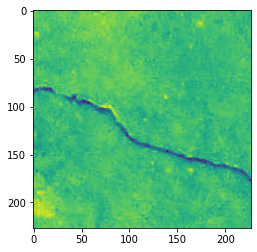

In [29]:
img_dir = '/Users/sakib/Downloads/Crack/train/positive/00020.jpg'
image =  plt.imread(img_dir)
image = Image.open(img_dir).convert("L")
image = np.asarray(image)
plt.imshow(image)

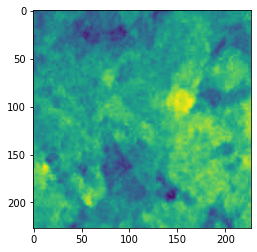

In [30]:
img_dir = '/Users/sakib/Downloads/Crack/train/negative/00020.jpg'
image =  plt.imread(img_dir)
image = Image.open(img_dir).convert("L")
image = np.asarray(image)
plt.imshow(image)

In [33]:
def process_image(image):
    ret,bi_inv = cv2.threshold(image,127,255,cv2.THRESH_BINARY_INV)
    #plt.imshow(bi_inv, 'gray')
    return bi_inv, image

def create_data(tdir_, type_, frm, to, t_data):
    colored_data=[]
    bi_inv_data=[]
    print('Working On '+t_data+' Data : '+type_ +'\n')
    rng = ["%05d" % x for x in range(frm, to+1)]
    for i in rng:
        dir_ =tdir_+type_+'/'+i+'.jpg'
        image = cv2.imread(dir_, 0)
        bi_inv, colored_img = process_image(image)
        colored_data.append(colored_img)
        bi_inv_data.append(bi_inv)   
        
    print('Images Processed from '+rng[0]+' to '+rng[len(rng)-1]+'\n')    
    return colored_data, bi_inv_data

In [34]:
train_data_colr= []
train_labels=[]
train_data_inv = []

train_data_colr_pos, train_data_inv_pos=  create_data(train_dir, 'positive', 1, 1500, 'Training')

for i in range(0, len(train_data_colr_pos)):
    train_data_colr.append(train_data_colr_pos[i])
    train_data_inv.append(train_data_inv_pos[i])
    train_labels.append(1)

train_data_colr_neg, train_data_inv_neg=  create_data(train_dir, 'negative', 1, 1500, 'Training')

for i in range(0, len(train_data_colr_neg)):
    train_data_colr.append(train_data_colr_neg[i])
    train_data_inv.append(train_data_inv_neg[i])
    train_labels.append(0)
    

final_train_colr = np.array(train_data_colr).reshape(((len(train_data_colr), 227, 227, 1)))        
final_train_inv = np.array(train_data_inv).reshape(((len(train_data_inv), 227, 227, 1)))   

print('Shape of Training Data : '+str(final_train_colr.shape))

Working On Training Data : positive

Images Processed from 00001 to 01500

Working On Training Data : negative

Images Processed from 00001 to 01500

Shape of Training Data : (3000, 227, 227, 1)


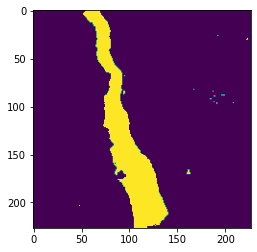

In [35]:
plt.imshow(train_data_inv_pos[10])

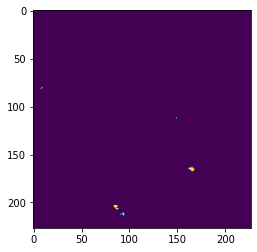

In [36]:
plt.imshow(train_data_inv_neg[15])

In [37]:
val_data_colr= []
val_labels=[]
val_data_inv = []

val_data_colr_pos, val_data_inv_pos=  create_data(val_dir, 'positive', 1701, 2000, 'Validation')


for i in range(0, len(val_data_colr_pos)):
    val_data_colr.append(val_data_colr_pos[i])
    val_data_inv.append(val_data_inv_pos[i])
    val_labels.append(1)

val_data_colr_neg, val_data_inv_neg=  create_data(val_dir, 'negative', 1701, 2000, 'Validation')

for i in range(0, len(val_data_colr_neg)):
    val_data_colr.append(val_data_colr_neg[i])
    val_data_inv.append(val_data_inv_neg[i])
    val_labels.append(0)
    
final_val_colr = np.array(val_data_colr).reshape(((len(val_data_colr), 227, 227, 1)))    
final_val_inv = np.array(val_data_inv).reshape(((len(val_data_inv), 227, 227, 1)))   

print('Shape of Validation Data : '+str(final_val_colr.shape))

Working On Validation Data : positive

Images Processed from 01701 to 02000

Working On Validation Data : negative

Images Processed from 01701 to 02000

Shape of Validation Data : (600, 227, 227, 1)


In [38]:
test_data_colr= []
test_labels=[]
test_data_inv = []

test_data_colr_pos, test_data_inv_pos=  create_data(test_dir, 'positive', 1501, 1700, 'Testing')


for i in range(0, len(test_data_colr_pos)):
    test_data_colr.append(test_data_colr_pos[i])
    test_data_inv.append(test_data_inv_pos[i])
    test_labels.append(1)

test_data_colr_neg, test_data_inv_neg=  create_data(test_dir, 'negative', 1501, 1700, 'Testing')

for i in range(0, len(test_data_colr_neg)):
    test_data_colr.append(test_data_colr_neg[i])
    test_data_inv.append(test_data_inv_neg[i])
    test_labels.append(0)
    
final_test_colr = np.array(test_data_colr).reshape(((len(test_data_colr), 227, 227, 1)))    
final_test_inv = np.array(test_data_inv).reshape(((len(test_data_inv), 227, 227, 1)))   

print('Shape of Testing Data : '+str(final_test_colr.shape))

Working On Testing Data : positive

Images Processed from 01501 to 01700

Working On Testing Data : negative

Images Processed from 01501 to 01700

Shape of Testing Data : (400, 227, 227, 1)


In [39]:
train_labels[20]

1

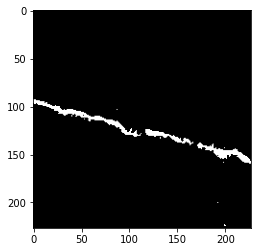

In [40]:
plt.imshow(train_data_inv[20], 'gray')

## Build the Convulation Neural Network (CNN)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.models import load_model

In [1]:
#Set the input shape
input_shape = (227, 227, 1)

#kernel_size
Wh = 3
Ww = 3

In [3]:
model = Sequential()

model.add(Conv2D(input_shape=input_shape , data_format="channels_last", kernel_size=(Wh,Ww), filters=32, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

NameError: name 'Sequential' is not defined